In [ ]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("iris.csv")

# Look at first 5 rows
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

# Column names
print("\nColumn names:", df.columns.tolist())

# Info about data types and null values
print("\nInfo:")
print(df.info())

# Statistical summary of numerical columns
print("\nStatistical summary:")
print(df.describe())

# Unique species
print("\nUnique species:")
print(df["Species"].unique())

# Count of each species
print("\nCount of each species:")
print(df["Species"].value_counts())

Shape of dataset: (150, 6)

Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Statistical summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000 

In [5]:
df = df.drop("Id", axis=1)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


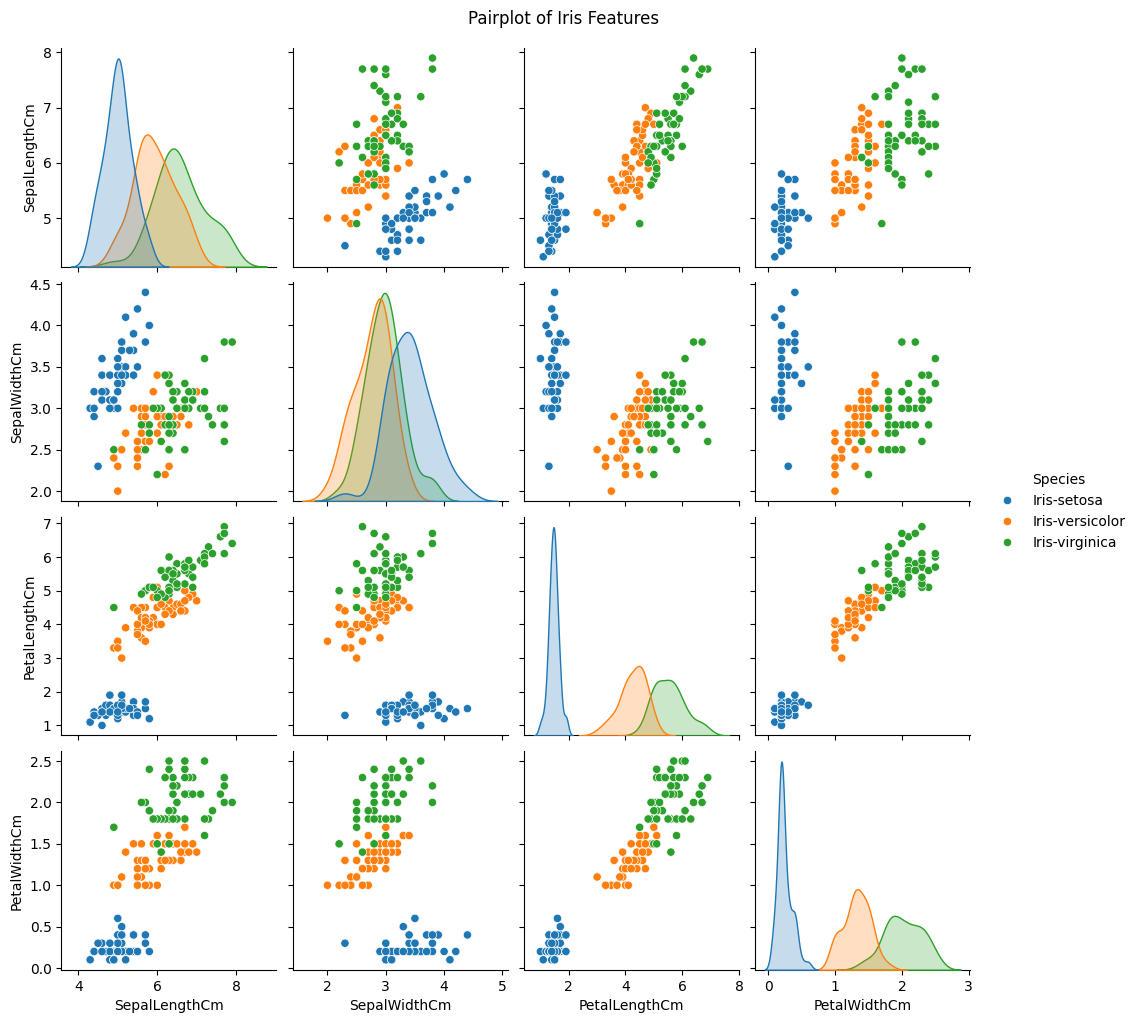

In [6]:
sns.pairplot(df, hue="Species")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

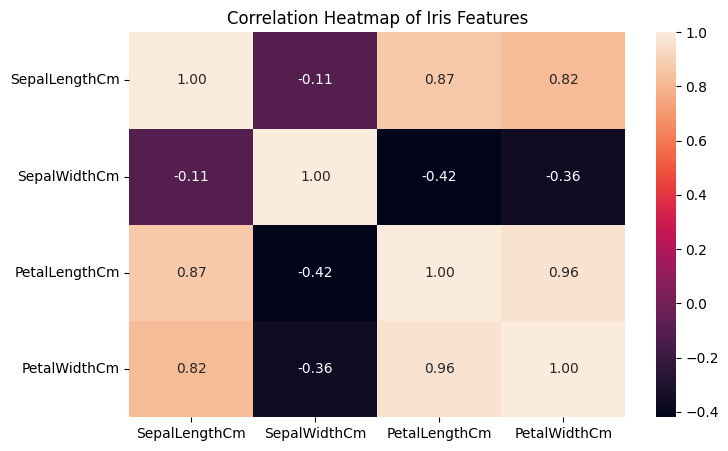

In [7]:
plt.figure(figsize=(8, 5))
corr = df.drop("Species", axis=1).corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

<Figure size 1000x600 with 0 Axes>

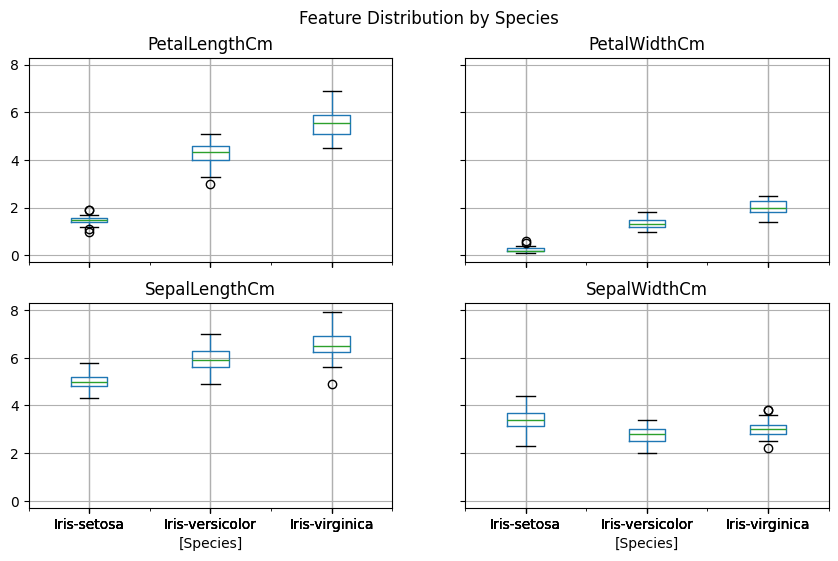

In [8]:
plt.figure(figsize=(10, 6))
df.boxplot(by="Species", figsize=(10,6))
plt.suptitle("Feature Distribution by Species")
plt.show()

In [9]:
# Features (independent variables)
X = df.drop("Species", axis=1)

# Target (dependent variable)
y = df["Species"]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (150, 4)
Target vector shape: (150,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 120
Test set size: 30


In [11]:
# Creating the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Predicting on test data
y_pred = knn_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of KNN model:", acc)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy of KNN model: 1.0

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



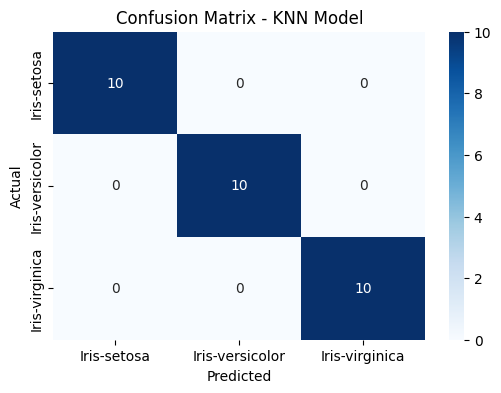

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=df["Species"].unique(),
            yticklabels=df["Species"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Model")
plt.show()

In [14]:
# Example new flower measurement
# [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]
new_sample = np.array([[5.0, 3.4, 1.5, 0.2]])

# Reshape to (1, -1) just to be safe
prediction = knn_model.predict(new_sample)

print("Predicted Species for sample", new_sample[0], "is:", prediction[0])

Predicted Species for sample [5.  3.4 1.5 0.2] is: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Accuracy of SVM model:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy of SVM model: 1.0

SVM Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [17]:
# ### ✅ Conclusion

# In this project, I worked on the Iris Flower Classification task as part of my AICTE Oasis Infobyte internship.

# I used the Iris dataset containing sepal length, sepal width, petal length, and petal width for three species: *Iris-setosa, Iris-versicolor,* and *Iris-virginica*. I performed data exploration, visualizations (pairplot, heatmap, boxplots), and then built a classification model using the K-Nearest Neighbors (KNN) algorithm.

# After splitting the data into training and testing sets, the model achieved a high accuracy on the test data and was able to correctly predict the species of iris flowers based on their measurements. I also experimented with an SVM model for comparison.

# This task helped me understand the complete machine learning workflow: loading data, preprocessing, EDA, model training, evaluation, and making predictions on new data.
